### Capstone Project 1: Milestone Report


### 2015 FLIGHT DELAYS AND CANCELLATIONS
Data is aquired from Kaggle:https://www.kaggle.com/oguzhany/2015-flight-delays-and-cancellations

### Outline:
This capstone project report includes the following sections
1. Data Introduction
2. Data Importing and Cleaning
3. Data Study
4. Modeling

### 1. Data Introduction
In 2015 there are lots of flight delays in United States for some reason. Nearly one third of all flights in our data set have delays. The main reasons for flight delays are wheather related but in some cases there are also airline or airport related flight delays. This document examines and shows the delay and cancellation causes in several aspects.

### 2. Data Importing and Cleaning

In [21]:
import os

### Load Packages and Libraries

In [22]:
import pandas as pd



In [23]:
os.chdir("/Users/lilie/Desktop/")

In [24]:
df = pd.read_csv("Flight_delay/flights2.csv")

/Users/lilie/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [25]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

### DATA WRANGLING/CLEANING DATA

The CSV files contain Many columns with NAN values: CANCELLATION_REASON, AIR_SYSTEM_DELAY, SECURITY_DELAY, AIRLINE_DELAY,LATE_AIRCRAFT_DELAY and WEATHER_DELAY. So I replaced The NAN values with 0 then replaced the values greater than 0 to 1.

In [27]:
df.isnull().sum(axis=0)

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

In [28]:
#replacing value larger than o to 1

df['AIR_TIME']=df['AIR_TIME'].fillna(0)
df[df['AIR_TIME']>0]['AIR_TIME']=1
df['AIR_TIME'].head()

/Users/lilie/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


0    169.0
1    263.0
2    266.0
3    258.0
4    199.0
Name: AIR_TIME, dtype: float64

In [29]:
#replacing value larger than o to 1

df['WEATHER_DELAY']=df['WEATHER_DELAY'].fillna(0)
df[df['WEATHER_DELAY']>0]['WEATHER_DELAY']=1
df['WEATHER_DELAY'].head()

/Users/lilie/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: WEATHER_DELAY, dtype: float64

In [30]:
#replacing value larger than o to 1

df['AIRLINE_DELAY']=df['AIRLINE_DELAY'].fillna(0)
df[df['AIRLINE_DELAY']>0]['AIRLINE_DELAY']=1
df['AIRLINE_DELAY'].head()

/Users/lilie/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: AIRLINE_DELAY, dtype: float64

### Finding Correlation/Scattered Plot

In [31]:
ig, ax = plt.subplots()
ax.set_title('Air_Time')
ax.set_xlabel('DEPARTURE_DELAY')
ax.set_ylabel('WEATHER_DELAY')

NameError: name 'plt' is not defined

count    5.819079e+06
mean     1.114620e+02
std      7.315421e+01
min      0.000000e+00
25%      5.900000e+01
50%      9.300000e+01
75%      1.430000e+02
max      6.900000e+02
Name: AIR_TIME, dtype: float64

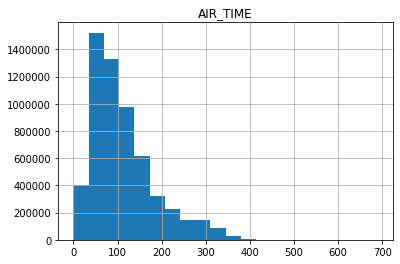

In [32]:
# chart for histogram
df.hist(column="AIR_TIME", bins= 20)
df.AIR_TIME.describe()

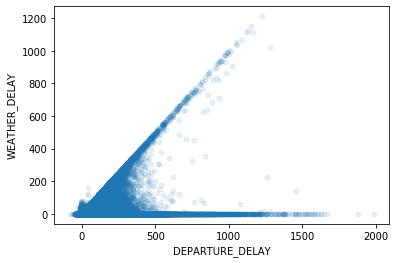

In [33]:
#Scater plot for departure_delay and weather_delay

df[(df.AIR_TIME >0) | (df['WEATHER_DELAY']>0)].plot(kind = 'scatter', 
                                                    x='DEPARTURE_DELAY', 
                                                    y = 'WEATHER_DELAY', alpha=0.1)#.set_yscale('log

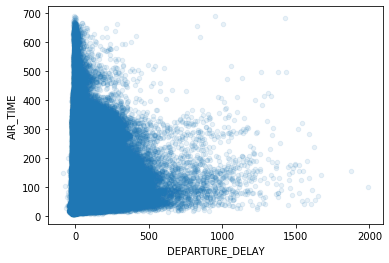

In [34]:
#Scater plot for departure_delay and Air_Time
df[df.AIR_TIME >0].plot(kind = 'scatter', x='DEPARTURE_DELAY', y = 'AIR_TIME', alpha=0.1)#.set_yscale('log')

Just by looking at the histogram and the scattered Plot between Departure_Delay and Air_Time, you may have noticed the positive Skewness.

,mean,std
AIRLINE,,
AA,34.370397,64.066709
AS,26.045976,43.518613
B6,37.617121,51.834979
DL,29.687442,57.686263
EV,40.840515,58.272978
F9,44.540767,68.785080
HA,16.844039,43.409133
MQ,40.163999,59.613051
NK,41.924149,54.761481


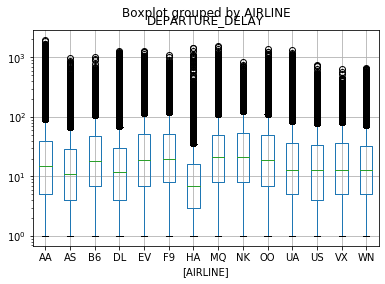

In [35]:
df[df.DEPARTURE_DELAY >0].boxplot(column=['DEPARTURE_DELAY'],by = ['AIRLINE']).set_yscale('log')
pd.DataFrame(df[df.DEPARTURE_DELAY >0].groupby( ['AIRLINE'])['DEPARTURE_DELAY'].describe().loc[:,['mean','std']])

Let's take a look at the correlation between Departure_Delay and Airline in the boxplots shown above. The boxplot displaying the distribution of different Airlines vs Departure_Delay.

### 3. Data Study

In [36]:
import numpy as np
import scipy.stats

In [37]:
# find correlation of scattered plot
a= np.array(df['DEPARTURE_DELAY'].fillna(0))
b= np.array(df['AIRLINE_DELAY'].fillna(0))

In [38]:
scipy.stats.pearsonr(a, b)

(0.6536884775197804, 0.0)

In [39]:
# find correlation of scattered plot
a= np.array(df['DEPARTURE_DELAY'].fillna(0))
b= np.array(df['SCHEDULED_DEPARTURE'].fillna(0))

In [40]:
scipy.stats.pearsonr(a, b)

(0.10888501353024418, 0.0)

In [41]:
# find correlation of scattered plot
a= np.array(df['DEPARTURE_DELAY'].fillna(0))
b= np.array(df['WEATHER_DELAY'].fillna(0))

In [42]:
scipy.stats.pearsonr(a, b)

(0.26358640449294235, 0.0)

In [43]:
# find correlation of scattered plot
a= np.array(df['DEPARTURE_DELAY'].fillna(0))
b= np.array(df['AIR_SYSTEM_DELAY'].fillna(0))

In [44]:
scipy.stats.pearsonr(a, b)

(0.30290441626351694, 0.0)

In [45]:
# find correlation of scattered plot
a= np.array(df['DEPARTURE_DELAY'].fillna(0))
b= np.array(df['SECURITY_DELAY'].fillna(0))

In [46]:
scipy.stats.pearsonr(a, b)

(0.028110835963387655, 0.0)

In [47]:
# find correlation of scattered plot
a= np.array(df['DEPARTURE_DELAY'].fillna(0))
b= np.array(df['ARRIVAL_DELAY'].fillna(0))

In [48]:
scipy.stats.pearsonr(a, b)

(0.9378898206146972, 0.0)

There is a strong positive correlation between DEPARTURE_DELAY & ARRIVAL_DELAY(0.9378898206146972, 0.0)

### PERFORM IN-DEPTH ANALYSIS/One-way ANOVA

In [49]:
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot

In [82]:
import numpy as np
np.set_printoptions(precision=4, suppress=True)
import statsmodels.api as sm
import pandas as pd
pd.set_option("display.width", 100)
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.graphics.api import interaction_plot, abline_plot
from statsmodels.stats.anova import anova_lm

In [83]:
# airline
AS = [98,135] 
US = [840]
AA = [2336, 258]

In [84]:
flight_numbers = df['FLIGHT_NUMBER']
flight_numbers

0            98
1          2336
2           840
3           258
4           135
           ... 
5819074     688
5819075     745
5819076    1503
5819077     333
5819078     839
Name: FLIGHT_NUMBER, Length: 5819079, dtype: int64

In [85]:
AIRLINE = df['AIRLINE']
AIRLINE

0          AS
1          AA
2          US
3          AA
4          AS
           ..
5819074    B6
5819075    B6
5819076    B6
5819077    B6
5819078    B6
Name: AIRLINE, Length: 5819079, dtype: object

In [86]:
data= pd.DataFrame({'AIRLINE': AIRLINE, 'flight_number': flight_numbers})

In [87]:
data.groupby('AIRLINE').mean()

,flight_number
AIRLINE,
AA,1281.651554
AS,426.907362
B6,911.451099
DL,1616.302924
EV,4706.703341
F9,820.153629
HA,217.476794
MQ,3313.165773
NK,541.483732


In [89]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
lm=ols('flight_number ~ AIRLINE', data=data).fit()
table=sm.stats.anova_lm(lm)
print(table)

                 df        sum_sq       mean_sq             F  PR(>F)
AIRLINE        13.0  1.294089e+13  9.954534e+11  1.152943e+06     0.0
Residual  5819065.0  5.024194e+12  8.634023e+05           NaN     NaN


### Compute overall mean

In [90]:
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot


In [91]:
# compute overall mean
overall_mean = data['flight_number'].mean()
overall_mean

2173.0927423394664

In [92]:
# compute Sum of Squares Total
data['overall_mean'] = overall_mean
ss_total = sum((data['flight_number'] - data['overall_mean'])**2)
ss_total

17965087607201.902

In [93]:
# compute group_mean
group_means = data.groupby('AIRLINE').mean()
group_means = group_means.rename(columns = {'flight_number': 'group_mean'})
group_means

,group_mean,overall_mean
AIRLINE,,
AA,1281.651554,2173.092742
AS,426.907362,2173.092742
B6,911.451099,2173.092742
DL,1616.302924,2173.092742
EV,4706.703341,2173.092742
F9,820.153629,2173.092742
HA,217.476794,2173.092742
MQ,3313.165773,2173.092742
NK,541.483732,2173.092742


In [94]:
# add group means and overall mean to the original data frame

data = data.merge(group_means, left_on ='AIRLINE', right_index = True)

In [95]:
# compute Sum of Squares Residual
ss_residual = sum((data['flight_number']- data['group_mean'])**2)
ss_residual
data

,AIRLINE,flight_number,overall_mean_x,group_mean,overall_mean_y
0,AS,98,2173.092742,426.907362,2173.092742
4,AS,135,2173.092742,426.907362,2173.092742
15,AS,108,2173.092742,426.907362,2173.092742
18,AS,122,2173.092742,426.907362,2173.092742
26,AS,130,2173.092742,426.907362,2173.092742
...,...,...,...,...,...
5817595,VX,769,2173.092742,574.940649,2173.092742
5817628,VX,357,2173.092742,574.940649,2173.092742
5817981,VX,1916,2173.092742,574.940649,2173.092742
5818056,VX,490,2173.092742,574.940649,2173.092742


In [96]:
n_groups = len(set(data['AIRLINE']))
n_obs = data.shape[0]
df_residual = n_obs - n_groups
ms_residual = ss_residual / df_residual
ms_residual

863402.2720182129

In [97]:
ss_explained = sum((data['flight_number'] - data['group_mean'])**2)
ss_explained

5024193942021.662

In [98]:
# compute Mean Square Explained
df_explained = n_groups - 1
ms_explained = ss_explained / df_explained
ms_explained

386476457078.5894

In [99]:
# compute F-Value
f = ms_explained / ms_residual
f

447620.3846153846

In [100]:
# compute p-value
import scipy.stats
p_value = 1 - scipy.stats.f.cdf(f, df_explained, df_residual)
p_value

1.1102230246251565e-16

### Interpret p-value
The sample means seems to be identical, the p-values is approximately 1

### I performed the One_Way ANOVA to determines whether any of these means are statistically significantly different from each other, but based on the results the answers are varied.

### 3. Modeling

### Creating Dummy Variables

In [101]:
df.loc[0:100,'DEPARTURE_DELAY']


0     -11.0
1      -8.0
2      -2.0
3      -5.0
4      -1.0
       ... 
96     -7.0
97     43.0
98    -12.0
99     -5.0
100    15.0
Name: DEPARTURE_DELAY, Length: 101, dtype: float64

In [102]:
 pd.get_dummies(df.loc[0:1000000,'TAIL_NUMBER'], drop_first=True)

,N001AA,N002AA,N003AA,N004AA,N005AA,N006AA,N007AA,N008AA,N009AA,N010AA,...,N994AT,N994DL,N995AT,N995DL,N996DL,N997DL,N998AT,N998DL,N999DN,N9EAMQ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
999997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
999998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
999999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
 pd.get_dummies(df.loc[0:1000,'ORIGIN_AIRPORT'], drop_first=True)

,ABI,ABQ,ABR,ACT,ACV,ACY,AEX,ALB,AMA,ANC,...,TPA,TTN,TUL,TUS,TWF,TXK,TYR,TYS,VPS,XNA
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
 pd.get_dummies(df.loc[0:1000000,'DESTINATION_AIRPORT'], drop_first=True)

,ABI,ABQ,ABR,ABY,ACT,ACV,ACY,ADK,ADQ,AEX,...,TYR,TYS,UST,VEL,VLD,VPS,WRG,XNA,YAK,YUM
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
999997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
999998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
999999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
df_AIRLINE_dummies = pd.get_dummies(df['AIRLINE'], prefix='AIRLINE')
df_new = df.join(df_AIRLINE_dummies, how='inner')


In [106]:
df_new= df_new.drop("AIRLINE",axis =1)



In [107]:
df_new= df_new.drop("ORIGIN_AIRPORT",axis =1)

In [108]:
df_new= df_new.drop("TAIL_NUMBER",axis =1)

In [109]:
df_new= df_new.drop("DESTINATION_AIRPORT",axis =1)

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
X= df_new.drop("DEPARTURE_DELAY", axis=1)
y= df_new["DEPARTURE_DELAY"]

In [112]:
 X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.33, random_state=42)

In [113]:
print(X_train.shape, y_train.shape)

(3898782, 40) (3898782,)


In [114]:
df_new.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,AIRLINE_EV,AIRLINE_F9,AIRLINE_HA,AIRLINE_MQ,AIRLINE_NK,AIRLINE_OO,AIRLINE_UA,AIRLINE_US,AIRLINE_VX,AIRLINE_WN
0,2015,1,1,4,98,5,2354.0,-11.0,21.0,15.0,...,0,0,0,0,0,0,0,0,0,0
1,2015,1,1,4,2336,10,2.0,-8.0,12.0,14.0,...,0,0,0,0,0,0,0,0,0,0
2,2015,1,1,4,840,20,18.0,-2.0,16.0,34.0,...,0,0,0,0,0,0,0,1,0,0
3,2015,1,1,4,258,20,15.0,-5.0,15.0,30.0,...,0,0,0,0,0,0,0,0,0,0
4,2015,1,1,4,135,25,24.0,-1.0,11.0,35.0,...,0,0,0,0,0,0,0,0,0,0
